In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error


In [72]:
data = pd.read_csv("meteorology_observation_202005.csv")

In [81]:
data.head()

,DATE_TIME,OBSERVATORY_NAME,SENSOR_TYPE_ID,SENSOR_TYPE,MINIMUM_TEMPERATURE,MAXIMUM_TEMPERATURE,AVERAGE_TEMPERATURE,MINIMUM_HUMIDITY,MAXIMUM_HUMIDITY,AVERAGE_HUMIDITY,...,AVERAGE_DIRECTIONOFWIND,MINIMUM_PRECIPITATION,MAXIMUM_PRECIPITATION,AVERAGE_PRECIPITATION,MINIMUM_ROAD_TEMPERATURE,MAXIMUM_ROAD_TEMPERATURE,AVERAGE_ROAD_TEMPERATURE,MINIMUM_FELT_TEMPERATURE,MAXIMUM_FELT_TEMPERATURE,AVERAGE_FELT_TEMPERATURE
0,2020-05-02 11:00:00,SILE_ISAKOY,3,AUTOMATED_WEATHER_SENSOR,20.40,22.30,21.10185,58.0,80.0,65.38889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-01 23:00:00,CANTA,2,AUTOMATED_WEATHER_SENSOR,14.32,15.35,14.92635,100.0,100.0,100.00000,...,174.71154,0.0,0.00,0.00000,NaN,NaN,NaN,15.58,18.95,16.25173
2,2020-05-01 01:00:00,SABIHAGOKCEN,1,ICING_SENSOR,12.13,12.99,12.63883,86.0,86.9,86.31000,...,271.63333,0.0,0.01,0.00967,17.7,18.4,18.02833,12.27,15.57,14.23700
3,2020-05-29 22:00:00,CATALCA_MGM,3,AUTOMATED_WEATHER_SENSOR,10.70,10.70,10.70000,89.0,89.0,89.00000,...,36.00000,NaN,NaN,NaN,NaN,NaN,NaN,12.23,12.23,12.23000
4,2020-05-31 04:00:00,SISLİ_MGM,3,AUTOMATED_WEATHER_SENSOR,16.70,18.70,18.00167,75.0,90.0,81.88333,...,165.18333,0.0,0.00,0.00000,NaN,NaN,NaN,17.63,20.12,18.96167


In [84]:
drop1=(["OBSERVATORY_NAME","DATE_TIME"])
data = data.drop(drop1,axis = 1)

In [87]:
data.head()

,SENSOR_TYPE_ID,SENSOR_TYPE,MINIMUM_TEMPERATURE,MAXIMUM_TEMPERATURE,AVERAGE_TEMPERATURE,MINIMUM_HUMIDITY,MAXIMUM_HUMIDITY,AVERAGE_HUMIDITY,MINIMUM_WIND,MAXIMUM_WIND,...,AVERAGE_DIRECTIONOFWIND,MINIMUM_PRECIPITATION,MAXIMUM_PRECIPITATION,AVERAGE_PRECIPITATION,MINIMUM_ROAD_TEMPERATURE,MAXIMUM_ROAD_TEMPERATURE,AVERAGE_ROAD_TEMPERATURE,MINIMUM_FELT_TEMPERATURE,MAXIMUM_FELT_TEMPERATURE,AVERAGE_FELT_TEMPERATURE
0,3,AUTOMATED_WEATHER_SENSOR,20.40,22.30,21.10185,58.0,80.0,65.38889,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AUTOMATED_WEATHER_SENSOR,14.32,15.35,14.92635,100.0,100.0,100.00000,0.014,2.048,...,174.71154,0.0,0.00,0.00000,NaN,NaN,NaN,15.58,18.95,16.25173
2,1,ICING_SENSOR,12.13,12.99,12.63883,86.0,86.9,86.31000,0.000,0.838,...,271.63333,0.0,0.01,0.00967,17.7,18.4,18.02833,12.27,15.57,14.23700
3,3,AUTOMATED_WEATHER_SENSOR,10.70,10.70,10.70000,89.0,89.0,89.00000,0.600,0.600,...,36.00000,NaN,NaN,NaN,NaN,NaN,NaN,12.23,12.23,12.23000
4,3,AUTOMATED_WEATHER_SENSOR,16.70,18.70,18.00167,75.0,90.0,81.88333,1.100,3.200,...,165.18333,0.0,0.00,0.00000,NaN,NaN,NaN,17.63,20.12,18.96167


In [89]:
cat_col = (["SENSOR_TYPE_ID","SENSOR_TYPE"])
data = pd.get_dummies(data, columns = cat_col)

In [90]:
data.head()

,MINIMUM_TEMPERATURE,MAXIMUM_TEMPERATURE,AVERAGE_TEMPERATURE,MINIMUM_HUMIDITY,MAXIMUM_HUMIDITY,AVERAGE_HUMIDITY,MINIMUM_WIND,MAXIMUM_WIND,AVERAGE_WIND,MINIMUM_DIRECTIONOFWIND,...,MAXIMUM_ROAD_TEMPERATURE,AVERAGE_ROAD_TEMPERATURE,MINIMUM_FELT_TEMPERATURE,MAXIMUM_FELT_TEMPERATURE,AVERAGE_FELT_TEMPERATURE,SENSOR_TYPE_ID_1,SENSOR_TYPE_ID_2,SENSOR_TYPE_ID_3,SENSOR_TYPE_AUTOMATED_WEATHER_SENSOR,SENSOR_TYPE_ICING_SENSOR
0,20.40,22.30,21.10185,58.0,80.0,65.38889,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,1,0
1,14.32,15.35,14.92635,100.0,100.0,100.00000,0.014,2.048,1.10998,93.0,...,NaN,NaN,15.58,18.95,16.25173,0,1,0,1,0
2,12.13,12.99,12.63883,86.0,86.9,86.31000,0.000,0.838,0.28223,101.0,...,18.4,18.02833,12.27,15.57,14.23700,1,0,0,0,1
3,10.70,10.70,10.70000,89.0,89.0,89.00000,0.600,0.600,0.60000,36.0,...,NaN,NaN,12.23,12.23,12.23000,0,0,1,1,0
4,16.70,18.70,18.00167,75.0,90.0,81.88333,1.100,3.200,2.08667,127.0,...,NaN,NaN,17.63,20.12,18.96167,0,0,1,1,0


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21556 entries, 0 to 21555
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SENSOR_TYPE_ID            21556 non-null  int64  
 1   SENSOR_TYPE               21556 non-null  object 
 2   MINIMUM_TEMPERATURE       21556 non-null  float64
 3   MAXIMUM_TEMPERATURE       21556 non-null  float64
 4   AVERAGE_TEMPERATURE       21556 non-null  float64
 5   MINIMUM_HUMIDITY          21321 non-null  float64
 6   MAXIMUM_HUMIDITY          21321 non-null  float64
 7   AVERAGE_HUMIDITY          21321 non-null  float64
 8   MINIMUM_WIND              20600 non-null  float64
 9   MAXIMUM_WIND              20600 non-null  float64
 10  AVERAGE_WIND              20600 non-null  float64
 11  MINIMUM_DIRECTIONOFWIND   20600 non-null  float64
 12  MAXIMUM_DIRECTIONOFWIND   20600 non-null  float64
 13  AVERAGE_DIRECTIONOFWIND   20600 non-null  float64
 14  MINIMU

In [74]:
data.describe()

,SENSOR_TYPE_ID,MINIMUM_TEMPERATURE,MAXIMUM_TEMPERATURE,AVERAGE_TEMPERATURE,MINIMUM_HUMIDITY,MAXIMUM_HUMIDITY,AVERAGE_HUMIDITY,MINIMUM_WIND,MAXIMUM_WIND,AVERAGE_WIND,...,AVERAGE_DIRECTIONOFWIND,MINIMUM_PRECIPITATION,MAXIMUM_PRECIPITATION,AVERAGE_PRECIPITATION,MINIMUM_ROAD_TEMPERATURE,MAXIMUM_ROAD_TEMPERATURE,AVERAGE_ROAD_TEMPERATURE,MINIMUM_FELT_TEMPERATURE,MAXIMUM_FELT_TEMPERATURE,AVERAGE_FELT_TEMPERATURE
count,21556.000000,21556.000000,21556.000000,21556.000000,21321.000000,21321.000000,21321.000000,20600.000000,20600.000000,20600.000000,...,20600.000000,17659.000000,17659.000000,17659.000000,12141.000000,12141.000000,12141.000000,20553.000000,20553.000000,20553.000000
mean,1.814576,15.695642,16.744897,16.207338,72.965234,78.740419,75.882735,3.425657,6.149596,4.665327,...,170.236821,0.426319,2.912961,1.429988,22.714834,25.167762,23.922375,15.807822,17.880278,16.788349
std,0.938811,3.741008,4.014923,3.864431,20.351512,18.453381,19.279793,23.103020,24.022266,23.761004,...,80.245536,5.901072,15.188869,9.373940,8.878394,10.005836,9.442558,4.321480,4.390099,4.350585
min,1.000000,4.178000,4.726000,4.472530,0.273000,0.342000,0.342000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.800000,8.200000,7.970000,-2.190000,-0.270000,-1.310330
25%,1.000000,13.280000,14.070000,13.667675,61.000000,68.420000,64.682710,0.219000,2.130000,1.127738,...,107.113818,0.000000,0.000000,0.000000,16.200000,17.300000,16.762710,12.980000,14.980000,13.919170
50%,1.000000,15.310000,16.300000,15.791975,75.650000,82.000000,79.000000,0.801000,3.410000,1.977920,...,181.669400,0.000000,0.000000,0.000000,20.100000,22.400000,21.229820,15.420000,17.480000,16.371690
75%,3.000000,17.800000,19.000000,18.373905,89.000000,93.000000,90.600000,1.650000,5.100000,3.172767,...,229.154450,0.000000,0.000000,0.000000,26.800000,31.100000,28.877050,18.240000,20.410000,19.271850
max,3.000000,33.630000,35.560000,34.210170,100.000000,100.000000,100.000000,251.100000,258.400000,253.196770,...,359.000000,143.600000,166.600000,151.046550,54.800000,56.200000,55.481130,44.290000,52.090000,47.880330


In [91]:
data.shape

(21556, 26)

In [92]:
data.isna().sum()

MINIMUM_TEMPERATURE                        0
MAXIMUM_TEMPERATURE                        0
AVERAGE_TEMPERATURE                        0
MINIMUM_HUMIDITY                         235
MAXIMUM_HUMIDITY                         235
AVERAGE_HUMIDITY                         235
MINIMUM_WIND                             956
MAXIMUM_WIND                             956
AVERAGE_WIND                             956
MINIMUM_DIRECTIONOFWIND                  956
MAXIMUM_DIRECTIONOFWIND                  956
AVERAGE_DIRECTIONOFWIND                  956
MINIMUM_PRECIPITATION                   3897
MAXIMUM_PRECIPITATION                   3897
AVERAGE_PRECIPITATION                   3897
MINIMUM_ROAD_TEMPERATURE                9415
MAXIMUM_ROAD_TEMPERATURE                9415
AVERAGE_ROAD_TEMPERATURE                9415
MINIMUM_FELT_TEMPERATURE                1003
MAXIMUM_FELT_TEMPERATURE                1003
AVERAGE_FELT_TEMPERATURE                1003
SENSOR_TYPE_ID_1                           0
SENSOR_TYP

<function matplotlib.pyplot.show(*args, **kw)>

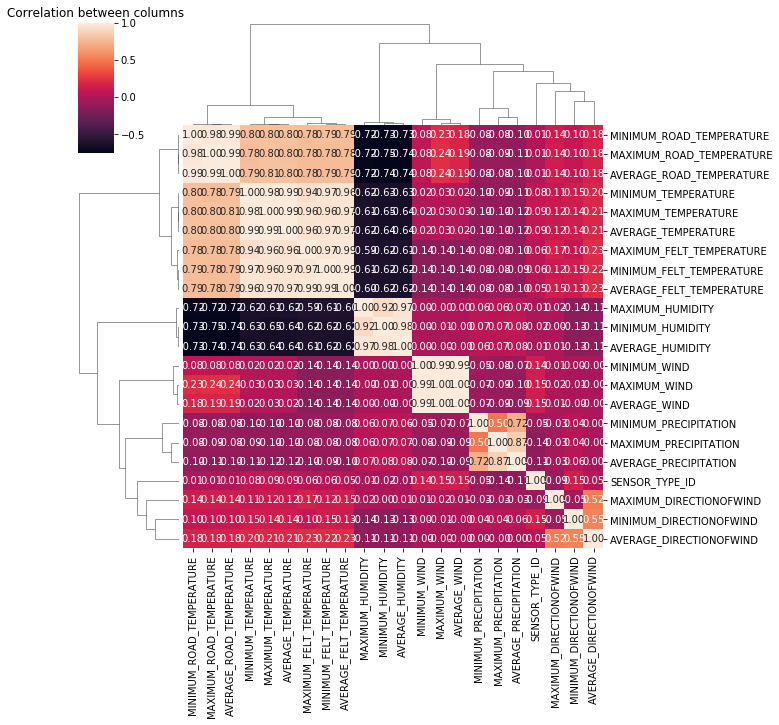

In [77]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between columns")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

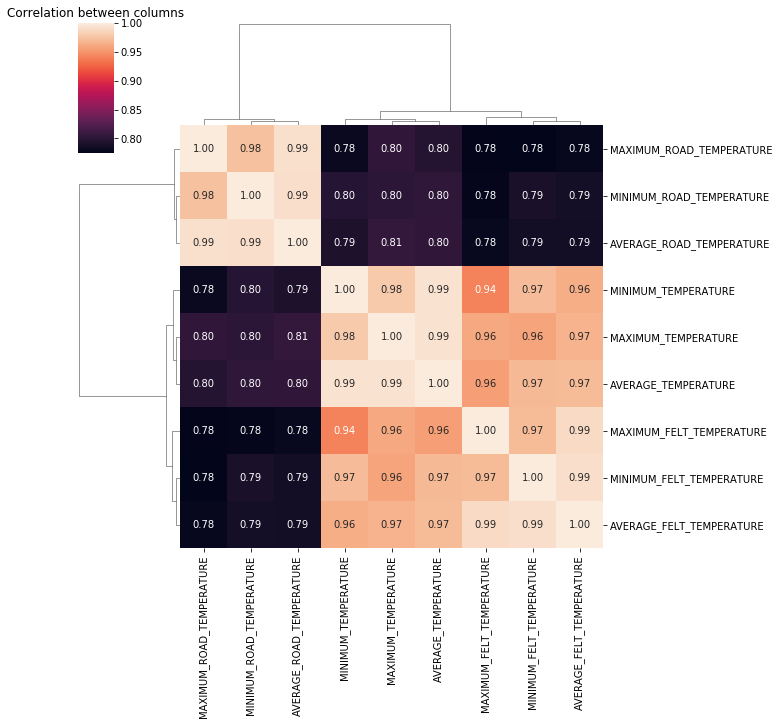

In [79]:
threeshold = 0.75
filtre = np.abs(corr_matrix["AVERAGE_TEMPERATURE"])>threeshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation between columns")
plt.show

In [93]:
columns =["MINIMUM_HUMIDITY","MAXIMUM_HUMIDITY","AVERAGE_HUMIDITY","MINIMUM_WIND","MAXIMUM_WIND","AVERAGE_WIND",
         "MINIMUM_DIRECTIONOFWIND","MAXIMUM_DIRECTIONOFWIND","AVERAGE_DIRECTIONOFWIND","MINIMUM_FELT_TEMPERATURE",
         "MAXIMUM_FELT_TEMPERATURE","AVERAGE_FELT_TEMPERATURE"]

In [95]:
for i in columns:
    data[i] = data[i].fillna(data[i].mean())


In [96]:
data.isna().sum()

MINIMUM_TEMPERATURE                        0
MAXIMUM_TEMPERATURE                        0
AVERAGE_TEMPERATURE                        0
MINIMUM_HUMIDITY                           0
MAXIMUM_HUMIDITY                           0
AVERAGE_HUMIDITY                           0
MINIMUM_WIND                               0
MAXIMUM_WIND                               0
AVERAGE_WIND                               0
MINIMUM_DIRECTIONOFWIND                    0
MAXIMUM_DIRECTIONOFWIND                    0
AVERAGE_DIRECTIONOFWIND                    0
MINIMUM_PRECIPITATION                   3897
MAXIMUM_PRECIPITATION                   3897
AVERAGE_PRECIPITATION                   3897
MINIMUM_ROAD_TEMPERATURE                9415
MAXIMUM_ROAD_TEMPERATURE                9415
AVERAGE_ROAD_TEMPERATURE                9415
MINIMUM_FELT_TEMPERATURE                   0
MAXIMUM_FELT_TEMPERATURE                   0
AVERAGE_FELT_TEMPERATURE                   0
SENSOR_TYPE_ID_1                           0
SENSOR_TYP

In [100]:
drop2=(["MINIMUM_TEMPERATURE","MAXIMUM_TEMPERATURE","MINIMUM_PRECIPITATION","MAXIMUM_PRECIPITATION",
        "AVERAGE_PRECIPITATION","MINIMUM_ROAD_TEMPERATURE","MAXIMUM_ROAD_TEMPERATURE","AVERAGE_ROAD_TEMPERATURE"])
data = data.drop(drop2,axis = 1)

In [101]:
data.isna().sum()

AVERAGE_TEMPERATURE                     0
MINIMUM_HUMIDITY                        0
MAXIMUM_HUMIDITY                        0
AVERAGE_HUMIDITY                        0
MINIMUM_WIND                            0
MAXIMUM_WIND                            0
AVERAGE_WIND                            0
MINIMUM_DIRECTIONOFWIND                 0
MAXIMUM_DIRECTIONOFWIND                 0
AVERAGE_DIRECTIONOFWIND                 0
MINIMUM_FELT_TEMPERATURE                0
MAXIMUM_FELT_TEMPERATURE                0
AVERAGE_FELT_TEMPERATURE                0
SENSOR_TYPE_ID_1                        0
SENSOR_TYPE_ID_2                        0
SENSOR_TYPE_ID_3                        0
SENSOR_TYPE_AUTOMATED_WEATHER_SENSOR    0
SENSOR_TYPE_ICING_SENSOR                0
dtype: int64

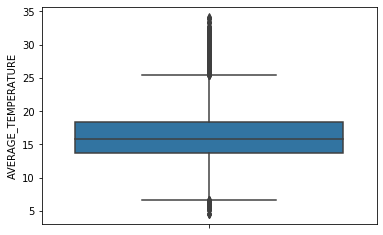

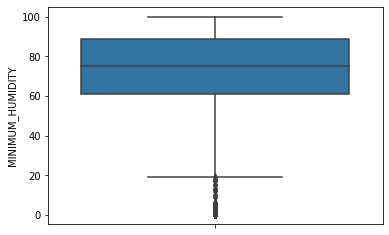

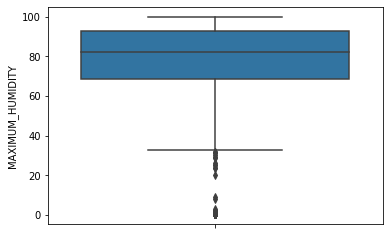

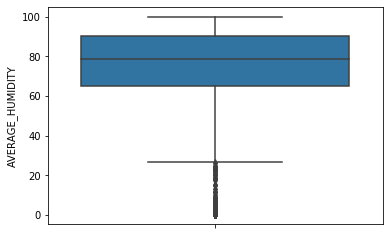

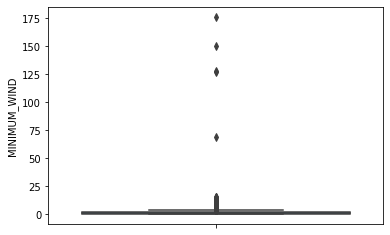

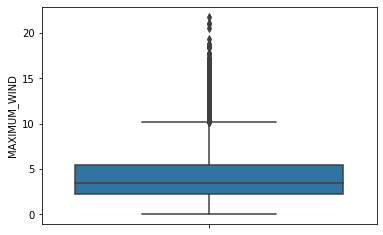

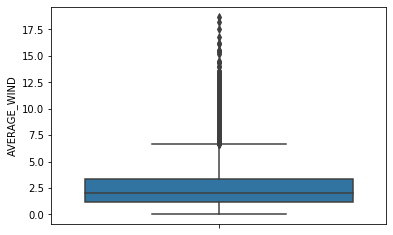

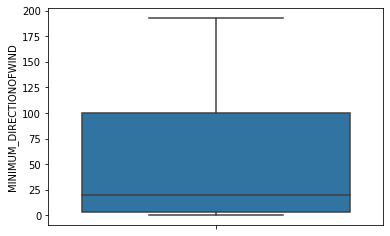

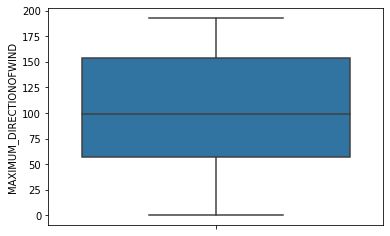

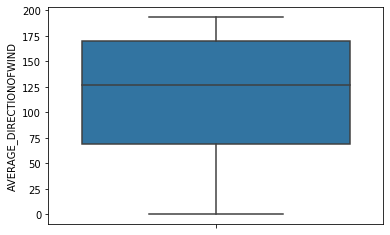

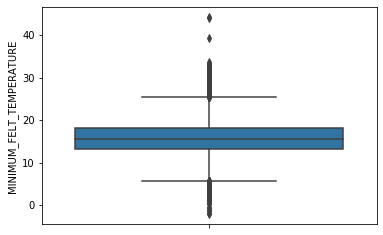

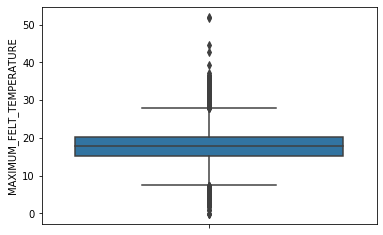

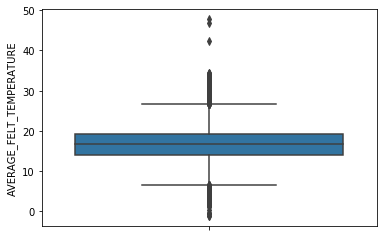

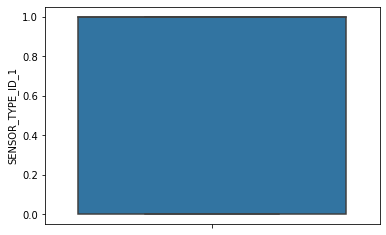

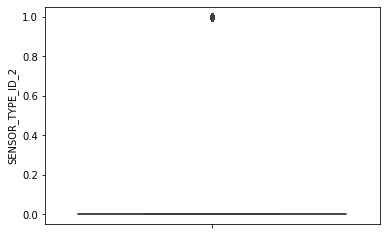

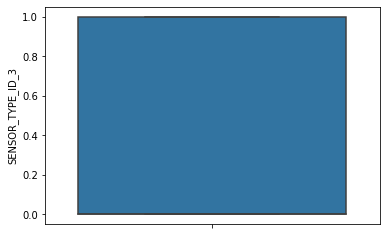

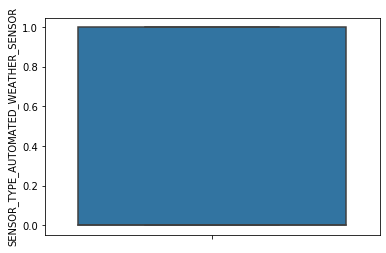

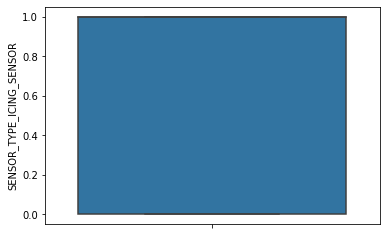

In [106]:
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")

In [125]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

In [126]:
outlier_list = ['MINIMUM_HUMIDITY','MAXIMUM_HUMIDITY','AVERAGE_HUMIDITY',"MINIMUM_WIND","MAXIMUM_WIND",
               "AVERAGE_WIND","MINIMUM_FELT_TEMPERATURE","MAXIMUM_FELT_TEMPERATURE","AVERAGE_FELT_TEMPERATURE"]

In [127]:
for i in data[outlier_list]:
    data[i]=treat_outlier(data[i])

In [129]:
data.shape

(21556, 18)

In [132]:
data = data.rename(columns = {"AVERAGE_TEMPERATURE":"target"})

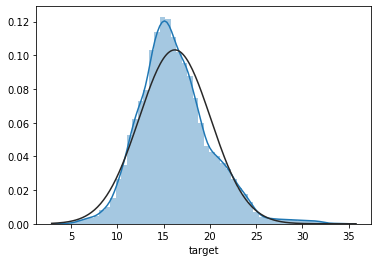

In [144]:
sns.distplot(data.target, fit = norm)

In [145]:
(mu, sigma) = norm.fit(data["target"])
print("mu: {}, sigma = {}".format(mu,sigma))

mu: 16.207337728706623, sigma = 3.864341142809112


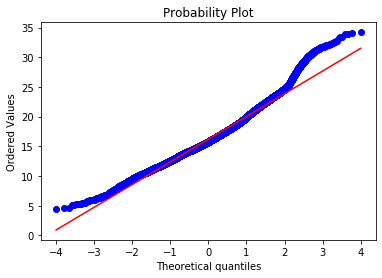

In [146]:
#qqplot
plt.figure()
stats.probplot(data["target"],plot= plt)
plt.show()

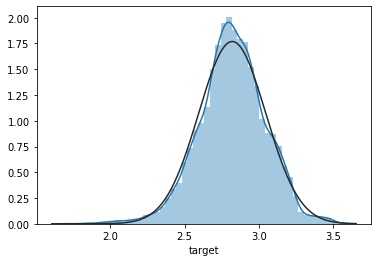

In [147]:
data["target"] = np.log1p(data["target"])
plt.figure
sns.distplot(data.target,fit = norm)

In [148]:
(mu, sigma) = norm.fit(data["target"])
print("mu: {}, sigma = {}".format(mu,sigma))


mu: 2.8202716103351753, sigma = 0.22547499506957383


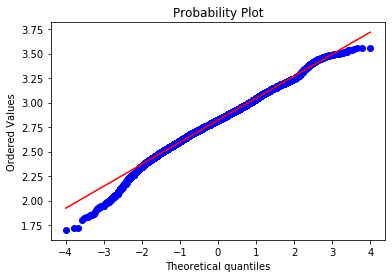

In [149]:
#qqplot
plt.figure()
stats.probplot(data["target"],plot= plt)
plt.show()

In [152]:
x = data.drop(["target"],axis = 1)
y= data.target

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [154]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [155]:
parametresGrid = {"nthread":[4],
                 "objective":["reg:linear"],
                 "learnin_rate":[0.03,0.05,0.07],
                 "max_depth" : [5,6,7],
                 "min_child_weight":[4],
                 "silent":[1],
                 "subsample":[0.7],
                 "colsample_bytree":[0.7],
                 "n_estimators":[500,1000]}

In [156]:
import xgboost as xgb

In [157]:
model_xgb = xgb.XGBRegressor()

In [158]:
clf = GridSearchCV(model_xgb, parametresGrid, cv = n_folds, scoring="neg_mean_squared_error", refit = True,
                  n_jobs = 5, verbose = True)

In [159]:
clf.fit(x_train, y_train)
model_xgb = clf.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  4.4min
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed: 11.0min finished


In [160]:
y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("XGBoost MSE: ", mse)

XGBoost MSE:  0.001587918934863322


In [167]:
clf.best_estimator_

ElasticNet(alpha=0.0001, l1_ratio=0.0, max_iter=10000, random_state=42)

In [173]:
y_test.head()

8645     2.983433
12353    2.916296
3261     2.959314
11187    3.238388
19142    2.881417
Name: target, dtype: float64

In [175]:
y_pred

array([2.9926033, 2.9143994, 2.9666448, ..., 3.0559905, 3.0230815,
       2.7653708], dtype=float32)